In [ ]:
import pandas as pd

url = "https://stats.moe.gov.tw/files/detail/112/112_sdata.csv"

df = pd.read_csv(url)

In [ ]:
idx = 0
df.iloc[1,:]
df.iloc[1][:]
df.iloc[idx]

# 先移除縣市名稱前的數字與空格:

# df.學校名稱.unique()
# df.columns

# df1 = df[['學校名稱', '縣市名稱']]
# city6 = []
# df1.學校名稱
# df1

In [ ]:
import re

found = []
city6 = ['臺北市', '新北市', '桃園市', '臺中市', '臺南市', '高雄市']


# 取出關鍵的欄位:
df1 = df[['學校名稱', '縣市名稱']]

# 僅保留同校的第一筆資料:
data = []
schools = []
for k in range(df1.shape[0]):
    if df1.iloc[k][0] not in schools:
        # 先移除縣市名稱前的數字與空格:
        pass

nos = {}
for city in city6:
    nos[city] = 0
    
for d in data:
    if d[1] in city6:
        nos[d[1]] += 1
    
max_value = max(nos.values())
explode = []
for v in nos.values():
    if v == max_value:
        explode.append(0.1)
    else:
        explode.append(0)
nos

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

#'''
plt.rcParams["font.sans-serif"] = "DFKai-SB"  #["Microsoft JhengHei"]  # 微軟正黑體
plt.rcParams["axes.unicode_minus"] = False
#'''

# 六都大專院校校數:
nos = {'臺北市': 24, '新北市': 20, '桃園市': 12, '臺中市': 17, '臺南市': 13, '高雄市': 15}

explode = [0.01] * 6
explode[0] = 0.1
# plt.plot(nos.keys(), nos.values())

# 六都傳院校數量圖餅圖:
plt.figure(figsize=(6.8, 6.8))

# plt.subplots(121)
plt.title('六都大專院校數量圖餅圖', fontsize=16)
plt.pie(nos.values(), labels=nos.keys(), explode=explode, 
        autopct='%2.1f%%', textprops={'color':"blue"}, shadow=False)


In [ ]:
plt.subplot(121)
plt.title('六都大專院校數量長條圖', fontsize=14)
plt.bar(nos.keys(), nos.values(), width=0.6)
plt.xticks(rotation=30)

plt.subplot(122)
explode = [0.02] * 6

plt.pie(
    x=nos.values(), 
    labels=nos.keys(),
    startangle=90,
    # show percentages
    autopct='%2.1f%%',
    # move the percentage inside the arcs
    pctdistance=0.80,
    # add space between the arcs
    explode=explode,
    textprops={'color':"blue"}
)
 
### Add a hole in the pie  
hole = plt.Circle((0, 0), 0.6, facecolor='white')
plt.gcf().gca().add_artist(hole)
 
plt.show()

# help(plt)

C:\Users\xpk20\AppData\Local\Temp\ipykernel_15388\2924885401.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["縣市名稱"] = df1["縣市名稱"].str[3:]


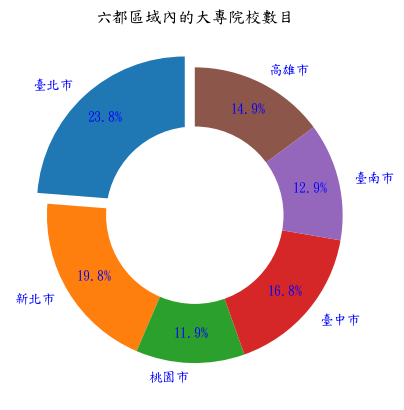

In [12]:
#q1
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["font.sans-serif"] = "DFKai-SB"  # ["Microsoft JhengHei"] # 微軟正黑體
plt.rcParams["axes.unicode_minus"] = False

# Read the CSV data into a DataFrame
df = pd.read_csv("112_student.csv")

city6 = ['臺北市', '新北市', '桃園市', '臺中市', '臺南市', '高雄市']

# 取出關鍵的欄位:
df1 = df[['學校名稱', '縣市名稱']]
df1["縣市名稱"] = df1["縣市名稱"].str[3:]

# 僅保留同校的第一筆資料:
data = df1.drop_duplicates(subset=['學校名稱'], keep='first').values.tolist()

nos = {city: 0 for city in city6}

for school, city in data:
    if city in city6:
        nos[city] += 1

max_value = max(nos.values())
explode = [0.1 if v == max_value else 0 for v in nos.values()]

plt.pie(
    x=nos.values(),
    labels=nos.keys(),
    startangle=90,
    # show percentages
    autopct='%2.1f%%',
    # move the percentage inside the arcs
    pctdistance=0.80,
    # add space between the arcs
    explode=explode,
    textprops={'color': "blue"}
)

### Add a hole in the pie
hole = plt.Circle((0, 0), 0.6, facecolor='white')
plt.gcf().gca().add_artist(hole)

plt.title("六都區域內的大專院校數目")
plt.show()



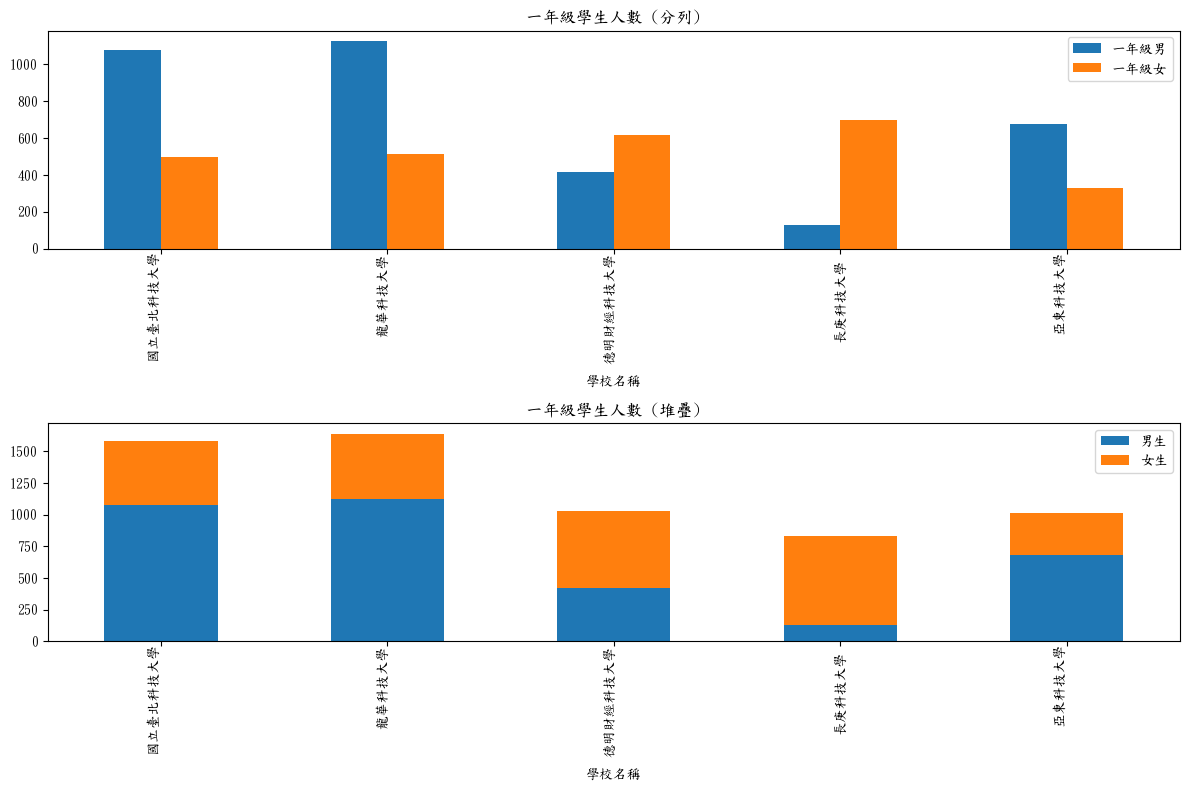

In [20]:
#q2
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["font.sans-serif"] = "DFKai-SB"  # ["Microsoft JhengHei"] # 微軟正黑體
plt.rcParams["axes.unicode_minus"] = False

# Read the CSV data into a DataFrame
df = pd.read_csv("112_student.csv")

schools = ['龍華科技大學', '國立臺北科技大學', '亞東科技大學', '長庚科技大學', '德明財經科技大學']
# 只保留日間部大學/大學部資料
df = df[(df['等級別'] == 'B 四技') & (df['日間∕進修別'] == 'D 日') & (df['學校名稱'].isin(schools))]

# 繪製柱狀圖
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

for ax, type in zip(axes, ['分列', '堆疊']):
    df_plot = df.set_index('學校名稱')[['一年級男', '一年級女']].astype(int)
    if type == '堆疊':
        df_plot = df_plot.rename(columns={'一年級男': '男生', '一年級女': '女生'})
        df_plot = pd.DataFrame({'男生': df_plot['男生'], 
                                '女生': df_plot['女生']})
        df_plot.plot(ax=ax, kind='bar', stacked=True)
    else:
        df_plot.plot(ax=ax, kind='bar')
    ax.set_title(f'一年級學生人數 ({type})')
    ax.legend()

plt.tight_layout()
plt.show()

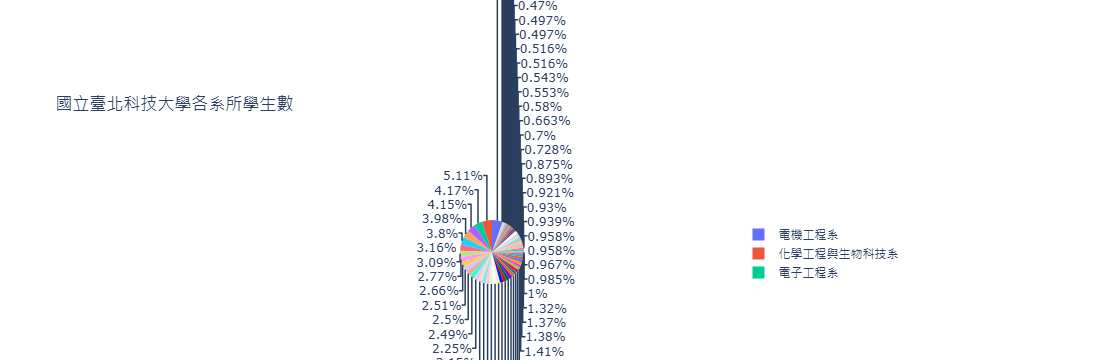

In [19]:
#q3
import pandas as pd
import plotly.express as px

# 讀取CSV檔案
data = pd.read_csv('112_students.csv')

# 篩選出"國立臺北科技大學"的日間部大學部資料
mask = (data['學校名稱'] == '國立臺北科技大學') & (data['日間∕進修別'].isin(['D 日', 'B 四技']))
data_filtered = data[mask]

# 計算各系所的總學生數
student_counts = data_filtered.groupby('科系名稱')['總計'].sum().reset_index()

# 繪製圓餅圖
fig = px.pie(student_counts, values='總計', names='科系名稱', title='國立臺北科技大學各系所學生數')
fig.show()